<a href="https://colab.research.google.com/github/Hkd225/sentiment-analysis-genshin-impact/blob/main/Sentiment_Analysis_of_Genshin_Impact_Indonesian_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper


from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google_play_scraper import app, reviews_all, Sort,reviews


scrapreview, continuation_token = reviews(
    'com.miHoYo.GenshinImpact',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=40000
)

In [ ]:
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])

In [ ]:

app_reviews_df = pd.DataFrame(scrapreview)


clean_df = app_reviews_df.dropna(subset=['content'])

# Menghapus duplikat berdasarkan isi ulasan
clean_df = clean_df.drop_duplicates(subset=['content'])

#Menyimpan hasil akhir ke CSV baru
clean_df.to_csv('ulasan_bersih.csv', index=False)

# 6. Final check
print(f"Jumlah ulasan awal: {len(app_reviews_df)}")
print(f"Jumlah ulasan setelah dibersihkan: {clean_df.shape[0]}")
review = clean_df.copy()

Jumlah ulasan awal: 36000
Jumlah ulasan setelah dibersihkan: 35980


In [ ]:
import pandas as pd
import re
import string
import csv
import requests
from io import StringIO
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pastikan NLTK terunduh
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


#INISIALISASI GLOBAL (Stemmer, Stopwords, Lexicon)

print("1. Memuat kamus Sastrawi & Stopwords... (Tunggu sebentar)")
factory = StemmerFactory()
stemmer = factory.create_stemmer()

listStopwords = set(stopwords.words('indonesian'))
listStopwords_eng = set(stopwords.words('english'))
listStopwords.update(listStopwords_eng)

# Mengamankan kata negasi
kata_negasi = {"tidak", "bukan", "belum", "jangan", "enggan"}
listStopwords = listStopwords - kata_negasi

# Typo ccustom_stop sudah diperbaiki menjadi custom_stop
custom_stop = ['iya','yaa','nya','na','sih','ku',"di","ya","gaa","loh","kah",
               "woi","woii","woy", "aja", "banget", "gw", "gua", "lu", "kalo",
               "dah", "doang", "kek", "cuman", "biar", "bikin", "gimana",
               "mulu", "udah", "pa", "pas", "tau", "kayak"]
listStopwords.update(custom_stop)

print("2. Mengunduh Kamus Lexicon dari GitHub...")
lexicon_positive = dict()
response_pos = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response_pos.status_code == 200:
    reader = csv.reader(StringIO(response_pos.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
response_neg = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response_neg.status_code == 200:
    reader = csv.reader(StringIO(response_neg.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Memuat kamus Sastrawi & Stopwords... (Tunggu sebentar)
2. Mengunduh Kamus Lexicon dari GitHub...


In [ ]:
slangwords = {

    "aj": "saja", "aja": "saja", "ajaa": "saja", "ajah": "saja", "ajagame": "saja game", "ajaitu": "saja itu",
    "bgt": "banget", "bgtt": "banget", "bngt": "banget", "banged": "banget", "bangettt": "banget",
    "jga": "juga", "jg": "juga", "jgn": "jangan",
    "ajaknp": "saja kenapa",
    "ajantar": "saja nanti",
    "ajatapi": "saja tetapi",
    "ajatolong": "saja tolong",
    "aint": "tidak",
    "gameaja": "game saja",
    "gamenya": "game",
    "gameny": "game",
    "bener": "benar",
    "Bener" :"benar",


    "gw": "saya", "gua": "saya", "gwa": "saya", "gue": "saya", "aq": "saya", "aku": "saya",
    "lu": "kamu", "lo": "kamu", "loe": "kamu", "elu": "kamu",
    "yg": "yang", "dgn": "dengan", "klo": "kalau", "kalo": "kalau", "klu": "kalau",
    "tp": "tetapi", "tpi": "tetapi", "tapi": "tetapi",
    "udh": "sudah", "udah": "sudah", "sdh": "sudah", "blum": "belum", "blm": "belum",
    "bisa": "bisa", "bs": "bisa", "bnyk": "banyak", "byk": "banyak", "gb" : "ukuran",


    "ga": "tidak", "gk": "tidak", "gak": "tidak", "ngga": "tidak", "nggak": "tidak", "g": "tidak",
    "bgs": "bagus", "jlk": "jelek", "mntp": "mantap", "kcewa": "kecewa",
    "kikir": "pelit", "suck": "menyebalkan", "good": "bagus",
    "anniv": "ulang tahun", "anniversary": "ulang tahun",
    "thank": "terima kasih", "thx": "terima kasih", "thanks": "terima kasih",
    "skip": "lewati", "hp": "handphone", "gift": "hadiah", "top": "terbaik",


    "character star": "karakter bintang", "quest": "misi", "mission": "misi",
    "dev": "pengembang", "developer": "pengembang", "update": "perbarui", "rate": "persentase",

    # SLANG GENSHIN IMPACT: GACHA & KEBERUNTUNGAN ---
    "ampas": "jelek", "bapuk": "jelek", "wangi": "bagus", "wangy": "bagus",
    "rateoff": "kalah", "rateon": "menang", "pity": "jaminan", "spook": "nyasar",
    "pull": "tarik", "gacha": "undi", "rng": "acak", "kuli": "capek", "b5": "karakter",

    # SLANG GENSHIN IMPACT: TEKNIS & PERFORMA ---
    "fc": "eror", "lag": "lambat", "ngelag": "lambat", "delay": "lambat", "patah": "lambat",
    "ping": "koneksi", "berat": "lambat", "bug": "eror", "stuck": "nyangkut",
    "batre": "baterai", "panas": "panas","logout" : "keluar", "silit": "jelek",

    # SLANG GENSHIN IMPACT: GAMEPLAY & ITEM ---
    "char": "karakter", "chara": "karakter", "weap": "senjata",
    "arte": "artefak", "arti": "artefak", "resin": "energi",
    "primo": "koin", "primogem": "koin", "primogems": "koin",
    "mhy": "pengembang", "mihoyo": "pengembang", "hoyo": "pengembang", "hoyoverse": "pengembang",
    "mabar": "main", "coop": "main", "ulti": "jurus", "burst": "jurus", "dmg": "kerusakan",
    "f2p": "gratisan", "whale": "sultan", "sepuh": "ahli", "puh": "ahli", "newbie": "pemula",
    "artefact":"barang", "artifact" : "barang", "artefacts" : "barang","artefak" : "barang","artifak" : "barang",
}


def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', str(text)) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf (dan angka yang sudah hilang)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

def casefoldingText(text):
    return text.lower()

def fix_slangwords(text):
    return ' '.join([slangwords.get(word, word) for word in text.split()])

def tokenizingText(text):
    return word_tokenize(text)

def filteringText(tokens):
    return [word for word in tokens if word not in listStopwords]

def stemmingText(tokens):
    return [stemmer.stem(word) for word in tokens]

def toSentence(list_words):
    return ' '.join(list_words)

# Fungsi sentimen yang sudah kebal dari KeyError 0
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Menggunakan parameter 'text', BUKAN 'review'
    if isinstance(text, str):
        words = text.split()
    elif isinstance(text, list):
        words = text
    else:
        try:
            words = list(text)
        except:
            return 0, 'neutral'

    for i, word in enumerate(words):
        is_negated = False
        if i > 0 and str(words[i-1]) in ["tidak", "bukan", "belum", "jangan"]:
            is_negated = True

        word_str = str(word)

        if word_str in lexicon_positive:
            weight = lexicon_positive[word_str]
            score += (-weight if is_negated else weight)

        if word_str in lexicon_negative:
            weight = abs(lexicon_negative[word_str])
            score -= (-weight if is_negated else weight)

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
# EKSEKUSI PIPELINE PADA DATAFRAME


print("\n3. Mulai Preprocessing Teks... (Tunggu beberapa saat)")
review = clean_df.copy() # Menggunakan variabel review agar aman

review['text_clean'] = review['content'].apply(cleaningText)
review['text_casefolding'] = review['text_clean'].apply(casefoldingText)
review['text_slangwords'] = review['text_casefolding'].apply(fix_slangwords)
review['text_tokenizing'] = review['text_slangwords'].apply(tokenizingText)
review['text_stopword'] = review['text_tokenizing'].apply(filteringText)

print("4. Mulai proses Stemming... (Ini memakan waktu paling lama)")
review['text_stemmed'] = review['text_stopword'].apply(stemmingText)
review['text_akhir'] = review['text_stemmed'].apply(toSentence)

print("5. Menghitung Skor Sentimen...")
# Menerapkan sentimen pada text_stemmed
results = review['text_stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
review['polarity_score'] = results[0]
review['polarity'] = results[1]

print("\nDistribusi Sentimen Akhir:")
print(review['polarity'].value_counts())


3. Mulai Preprocessing Teks... (Tunggu beberapa saat)
4. Mulai proses Stemming... (Ini memakan waktu paling lama)
5. Menghitung Skor Sentimen...

Distribusi Sentimen Akhir:
polarity
negative    20161
positive    13377
neutral      2442
Name: count, dtype: int64



6. Menyiapkan Visualisasi WordCloud...


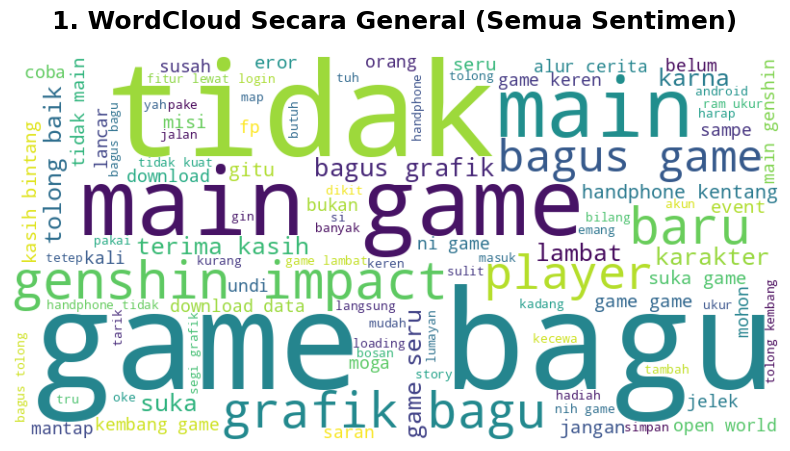

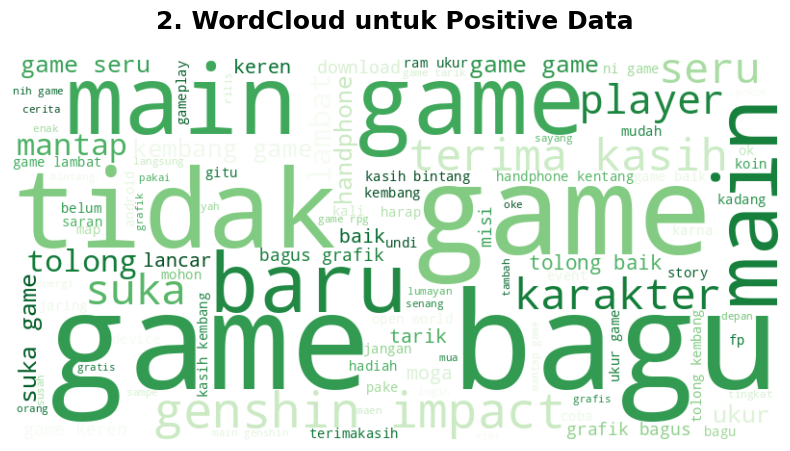

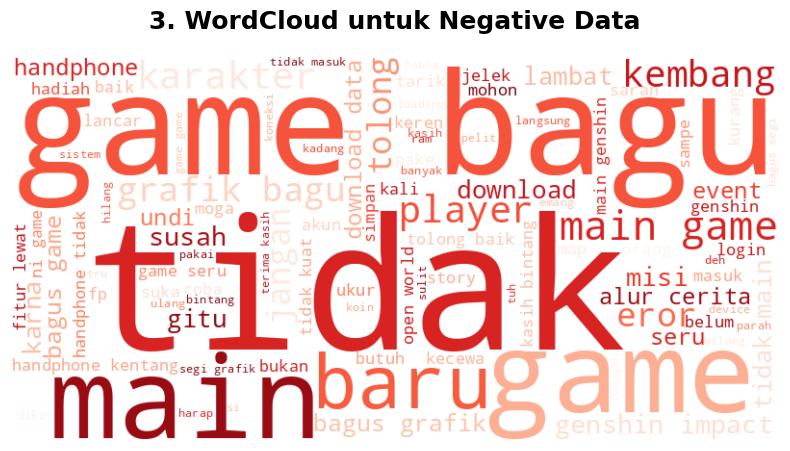

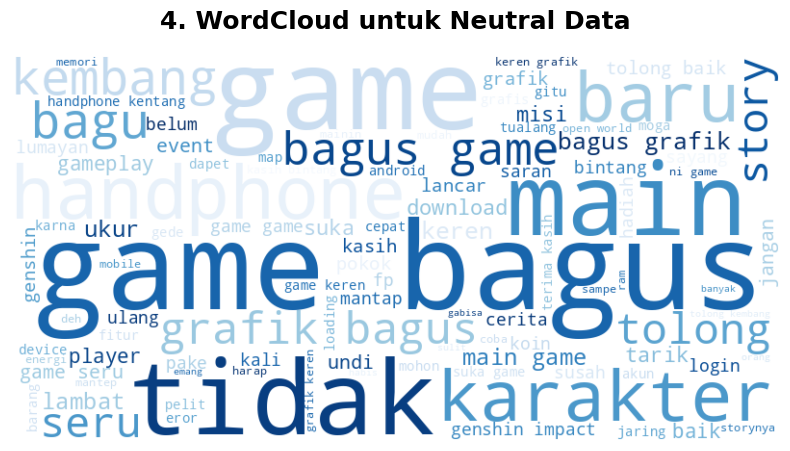

In [ ]:

# VISUALISASI WORDCLOUD (DENGAN TAMBAHAN NETRAL)

print("\n6. Menyiapkan Visualisasi WordCloud...")

# Mengelompokkan teks berdasarkan sentimen
text_general = ' '.join(review['text_akhir'].astype(str).dropna())
text_positive = ' '.join(review[review['polarity'] == 'positive']['text_akhir'].astype(str).dropna())
text_negative = ' '.join(review[review['polarity'] == 'negative']['text_akhir'].astype(str).dropna())

# ---> TAMBAHAN: Mengelompokkan teks untuk sentimen Netral
text_neutral = ' '.join(review[review['polarity'] == 'neutral']['text_akhir'].astype(str).dropna())


def plot_wordcloud(text, title, colormap):
    if not text.strip():
        print(f"Peringatan: Tidak ada data kata untuk {title}")
        return
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        colormap=colormap, max_words=100, contour_width=3, contour_color='steelblue'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18, pad=20, fontweight='bold')
    plt.axis('off')
    plt.show()

# Memanggil fungsi plot untuk ke-4 kategori
plot_wordcloud(text_general, '1. WordCloud Secara General (Semua Sentimen)', 'viridis')
plot_wordcloud(text_positive, '2. WordCloud untuk Positive Data', 'Greens')
plot_wordcloud(text_negative, '3. WordCloud untuk Negative Data', 'Reds')

# ---> TAMBAHAN: Memanggil plot WordCloud Netral (Menggunakan tema warna Biru/Blues)
plot_wordcloud(text_neutral, '4. WordCloud untuk Neutral Data', 'Blues')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


print("1. Memisahkan fitur (X) dan target label (y)...")


X = review['text_akhir'].astype(str).fillna('')
y = review['polarity']


print("2. Melakukan Data Splitting (80% Train, 20% Test)...")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"   -> Jumlah Data Latih (Training) : {X_train.shape[0]} baris")
print(f"   -> Jumlah Data Uji (Testing)    : {X_test.shape[0]} baris")


print("\n3. Memulai Ekstraksi Fitur dengan TF-IDF...")


tfidf = TfidfVectorizer()


X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

print("   -> Ekstraksi fitur selesai!")
print(f"   -> Dimensi Matriks Data Latih : {X_train_tfidf.shape} (Baris, Jumlah Fitur Kata)")
print(f"   -> Dimensi Matriks Data Uji   : {X_test_tfidf.shape} (Baris, Jumlah Fitur Kata)")


fitur_kata = tfidf.get_feature_names_out()
print("\nContoh 10 kata yang dijadikan fitur oleh TF-IDF:")
print(fitur_kata[100:110])

1. Memisahkan fitur (X) dan target label (y)...
2. Melakukan Data Splitting (80% Train, 20% Test)...
   -> Jumlah Data Latih (Training) : 28784 baris
   -> Jumlah Data Uji (Testing)    : 7196 baris

3. Memulai Ekstraksi Fitur dengan TF-IDF...
   -> Ekstraksi fitur selesai!
   -> Dimensi Matriks Data Latih : (28784, 26673) (Baris, Jumlah Fitur Kata)
   -> Dimensi Matriks Data Uji   : (7196, 26673) (Baris, Jumlah Fitur Kata)

Contoh 10 kata yang dijadikan fitur oleh TF-IDF:
['accepted' 'accessible' 'accompanying' 'account' 'accountdikarnakan'
 'acer' 'acha' 'achievement' 'achievementgo' 'achievementlvl']


In [ ]:
!pip install gensim tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

# --- Library Deep Learning (LSTM) ---
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping

# Menyiapkan Data X dan y
X = review['text_akhir'].astype(str).fillna('')
y = review['polarity']

print("Mulai Menjalankan 3 Skema Eksperimen (Machine Learning vs Deep Learning)...\n")
print("="*50)



# SKEMA 1: Sequence Embedding + RNN/GRU + Split 70:30
#=================================================


print("⏳ Menjalankan SKEMA 1 (Sequence | RNN-GRU | Split 70:30)...")

# 1. Membagi Data (Diperbaiki menjadi test_size=0.2)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Label Encoding untuk Neural Network
encoder1 = LabelEncoder()
y_train_encoded1 = encoder1.fit_transform(y_train1)
y_test_encoded1 = encoder1.transform(y_test1)

# 3. Tokenisasi dan Padding (Syarat wajib untuk RNN/GRU)
max_len1 = 50
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(X_train1)

X_train_seq1 = tokenizer1.texts_to_sequences(X_train1)
X_test_seq1 = tokenizer1.texts_to_sequences(X_test1)

X_train_pad1 = pad_sequences(X_train_seq1, maxlen=max_len1, padding='post')
X_test_pad1 = pad_sequences(X_test_seq1, maxlen=max_len1, padding='post')

vocab_size1 = len(tokenizer1.word_index) + 1

# 4. Membangun Arsitektur RNN varian GRU
model_gru = Sequential()

# Embedding biasa, membiarkan GRU belajar makna kata dari nol (tanpa Word2Vec)
model_gru.add(Embedding(input_dim=vocab_size1, output_dim=100))

# Menggunakan GRU (Saudara LSTM yang lebih ringan dan cepat)
model_gru.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))

# Layer rahasia kesuksesan Anda sebelumnya (Dropout + Dense ReLU)
model_gru.add(Dropout(0.5))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dropout(0.2))

# Output layer 3 kelas
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Melatih Model (Kita gunakan 15 Epochs agar tidak terlalu lama menunggunya)
print("   [Info] Melatih model RNN/GRU, silakan tunggu...")
model_gru.fit(X_train_pad1, y_train_encoded1, epochs=15, batch_size=32, verbose=1)

# 6. Evaluasi Skema 1
y_pred1_prob = model_gru.predict(X_test_pad1, verbose=0)
y_pred1_classes = np.argmax(y_pred1_prob, axis=1)

akurasi_skema1 = accuracy_score(y_test_encoded1, y_pred1_classes)
print(f"✅ Skema 1 Selesai dengan Akurasi: {akurasi_skema1 * 100:.2f}%\n")


# SKEMA 2: Word2Vec + LSTM + Split 70:30 (DEEP LEARNING)
#=================================================


print("⏳ Menjalankan SKEMA 2 (Word2Vec | LSTM | Split 80:20)...")
print("   [Info] Membangun arsitektur Neural Network, ini akan memakan waktu sedikit lebih lama...")

# 1. Label Encoding (LSTM butuh label berupa angka 0, 1, 2)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train1)
y_test_encoded = encoder.transform(y_test1)

# 2. Tokenisasi Keras & Padding (Menyamakan panjang kalimat)
max_len = 50 # Asumsi panjang maksimal 1 ulasan adalah 50 kata
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train1)

X_train_seq = tokenizer.texts_to_sequences(X_train1)
X_test_seq = tokenizer.texts_to_sequences(X_test1)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 3. Melatih Gensim Word2Vec
X_train_tok = [str(text).split() for text in X_train1]
w2v_model = Word2Vec(sentences=X_train_tok, vector_size=100, window=5, min_count=3, workers=4)
hentikan_otomatis = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 4. Membuat Embedding Matrix untuk disuntikkan ke LSTM
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# 5. Membangun Model LSTM
model_lstm = Sequential()
# Memasukkan bobot Word2Vec ke dalam Embedding Layer
model_lstm.add(Embedding(input_dim=vocab_size,
                         output_dim=100,
                         weights=[embedding_matrix],
                         trainable=True)) # False agar bobot W2V asli tidak rusak
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax')) # 3 = Jumlah kelas sentimen

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Melatih Model LSTM
# Epochs = jumlah perulangan belajar. Gunakan 5 agar tidak terlalu lama untuk eksperimen.
model_lstm.fit(X_train_pad, y_train_encoded,
               epochs=100,
               batch_size=64,
               validation_data=(X_test_pad, y_test_encoded),
               callbacks=[hentikan_otomatis],
               verbose=1)

# 7. Evaluasi LSTM
y_pred2_prob = model_lstm.predict(X_test_pad, verbose=1)
y_pred2_classes = np.argmax(y_pred2_prob, axis=1) # Mengambil kelas dengan probabilitas tertinggi

akurasi_skema2 = accuracy_score(y_test_encoded, y_pred2_classes)
print(f"✅ Skema 2 Selesai!\n")


# SKEMA 3: TF-IDF + SVM + Split 70:30
#=================================================

print("⏳ Menjalankan SKEMA 3 (TF-IDF | SVM | Split 70:30)...")
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf3 = TfidfVectorizer(min_df=3)
X_train_tfidf3 = tfidf3.fit_transform(X_train3)
X_test_tfidf3 = tfidf3.transform(X_test3)

svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_train_tfidf3, y_train3)
y_pred3 = svm_tfidf.predict(X_test_tfidf3)
akurasi_skema3 = accuracy_score(y_test3, y_pred3)
print(f"✅ Skema 3 Selesai!\n")

print("="*50)

# RINGKASAN HASIL
# =================================================
print("🏆 KESIMPULAN HASIL EKSPERIMEN 🏆")
print("-" * 50)
print(f"Skema 1 (model RNN/GRU [70:30]) : {akurasi_skema1 * 100:.2f}%")
print(f"Skema 2 (Word2Vec + LSTM [70:30])      : {akurasi_skema2 * 100:.2f}%")
print(f"Skema 3 (TF-IDF + SVM [70:30])         : {akurasi_skema3 * 100:.2f}%")
print("-" * 50)

# Mencari skema terbaik otomatis
hasil = {"Skema 1": akurasi_skema1, "Skema 2": akurasi_skema2, "Skema 3": akurasi_skema3}
skema_terbaik = max(hasil, key=hasil.get)
print(f"🚀 Skema paling optimal untuk dataset Anda adalah: {skema_terbaik}")

Mulai Menjalankan 3 Skema Eksperimen (Machine Learning vs Deep Learning)...

⏳ Menjalankan SKEMA 1 (Sequence | RNN-GRU | Split 80:20)...
   [Info] Melatih model RNN/GRU, silakan tunggu...
Epoch 1/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.5500 - loss: 0.8999
Epoch 2/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.5576 - loss: 0.8832
Epoch 3/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5783 - loss: 0.8559
Epoch 4/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.8577 - loss: 0.4067
Epoch 5/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9024 - loss: 0.2704
Epoch 6/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9326 - loss: 0.1870
Epoch 7/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9451 - loss: 0.1480
Epoch 8/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.9565 - loss: 0.1210
Epoch 9/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.9630 - loss: 0.1028
Epoch 10/15
788/788 

In [ ]:
import joblib

# ==============================================================================
# MENYIMPAN MODEL DAN OBJEK PENDUKUNG
# ==============================================================================
print("\n" + "="*50)
print("💾 MENYIMPAN MODEL DAN OBJEK KE DALAM FILE...")

# ---------------------------------------------------------
# 1. Simpan Skema 1 (GRU Model & Objek Pendukung)
# ---------------------------------------------------------
# Menyimpan Model GRU
model_gru.save('model_skema1_gru.keras')
# Menyimpan Tokenizer dan LabelEncoder Skema 1
joblib.dump(tokenizer1, 'tokenizer_skema1.joblib')
joblib.dump(encoder1, 'label_encoder_skema1.joblib')
print("✅ Skema 1 (GRU) beserta Tokenizer & Encoder berhasil disimpan.")

# ---------------------------------------------------------
# 2. Simpan Skema 2 (LSTM Model, Word2Vec, & Objek Pendukung)
# ---------------------------------------------------------
# Menyimpan Model LSTM
model_lstm.save('model_skema2_lstm.keras')
# Menyimpan model Word2Vec (opsional, jika ingin melihat vektor kata di masa depan)
w2v_model.save('word2vec_skema2.model')
# Menyimpan Tokenizer dan LabelEncoder Skema 2 (sama dengan skema 1, tapi disimpan agar rapi)
joblib.dump(tokenizer, 'tokenizer_skema2.joblib')
joblib.dump(encoder, 'label_encoder_skema2.joblib')
print("✅ Skema 2 (LSTM & Word2Vec) beserta Tokenizer & Encoder berhasil disimpan.")

# ---------------------------------------------------------
# 3. Simpan Skema 3 (SVM Model & TF-IDF Vectorizer)
# ---------------------------------------------------------
# Menyimpan Model SVM
joblib.dump(svm_tfidf, 'model_skema3_svm.joblib')
# Menyimpan TF-IDF Vectorizer (SANGAT PENTING untuk mengubah teks baru menjadi angka nanti)
joblib.dump(tfidf3, 'tfidf_vectorizer_skema3.joblib')
print("✅ Skema 3 (SVM) beserta TF-IDF Vectorizer berhasil disimpan.")

print("="*50)
print("🎉 SEMUA PROSES SELESAI! Model siap digunakan untuk klasifikasi data baru.")


💾 MENYIMPAN MODEL DAN OBJEK KE DALAM FILE...
✅ Skema 1 (GRU) beserta Tokenizer & Encoder berhasil disimpan.
✅ Skema 2 (LSTM & Word2Vec) beserta Tokenizer & Encoder berhasil disimpan.
✅ Skema 3 (SVM) beserta TF-IDF Vectorizer berhasil disimpan.
🎉 SEMUA PROSES SELESAI! Model siap digunakan untuk klasifikasi data baru.


In [ ]:
# Jalankan di cell Colab
!pip freeze > requirements.txt

print("File requirements.txt berhasil dibuat dari seluruh environment Colab!")

File requirements.txt berhasil dibuat dari seluruh environment Colab!


In [ ]:
# ==============================================================================
# 🧪 TES PREDIKSI KALIMAT BARU (DENGAN PREPROCESSING)
# ==============================================================================
print("\n" + "="*50)
print("🔍 UJI COBA MODEL DENGAN ULASAN BARU")
print("="*50)

# 1. Masukkan kalimat mentah yang ingin diuji
ulasan_baru_mentah = [
    "Gamenya seru banget, grafiknya bagus dan story-nya menarik.",
    "Buriq, gacha ampas terus, sering force close pula, nyesel install!",
    "Ya lumayan lah buat ngisi waktu luang, tapi ukurannya terlalu besar.",
    "a lumayan lah buat ngisi waktu luang, tapi ukurannya terlalu besar"
]

# 2. Proses pembersihan kalimat agar sama dengan data latih
ulasan_baru_bersih = []
print("Membersihkan teks ulasan baru...")
for teks in ulasan_baru_mentah:
    t = cleaningText(teks)
    t = casefoldingText(t)
    t = fix_slangwords(t)
    t = tokenizingText(t)
    t = filteringText(t)
    t = stemmingText(t)
    t = toSentence(t)
    ulasan_baru_bersih.append(t)

print("Teks Siap Prediksi:", ulasan_baru_bersih)

# --- TES SKEMA 1 (GRU) ---
print("\n[ Hasil Prediksi Skema 1 (Sequence + GRU) ]")
# Gunakan teks yang SUDAH BERSIH
seq1 = tokenizer1.texts_to_sequences(ulasan_baru_bersih)
pad1 = pad_sequences(seq1, maxlen=max_len1, padding='post')
pred_prob1 = model_gru.predict(pad1, verbose=0)
pred_class1 = np.argmax(pred_prob1, axis=1)
hasil_teks1 = encoder1.inverse_transform(pred_class1)

for teks_asli, hasil in zip(ulasan_baru_mentah, hasil_teks1):
    print(f"Ulasan: '{teks_asli}'\nPrediksi: {hasil}\n")


# --- TES SKEMA 2 (LSTM + Word2Vec) ---
print("-" * 50)
print("\n[ Hasil Prediksi Skema 2 (LSTM + Word2Vec) ]")
# Gunakan teks yang SUDAH BERSIH
seq2 = tokenizer.texts_to_sequences(ulasan_baru_bersih)
pad2 = pad_sequences(seq2, maxlen=max_len, padding='post')
pred_prob2 = model_lstm.predict(pad2, verbose=0)
pred_class2 = np.argmax(pred_prob2, axis=1)
hasil_teks2 = encoder.inverse_transform(pred_class2)

for teks_asli, hasil in zip(ulasan_baru_mentah, hasil_teks2):
    print(f"Ulasan: '{teks_asli}'\nPrediksi: {hasil}\n")


# --- TES SKEMA 3 (SVM + TF-IDF) ---
print("-" * 50)
print("\n[ Hasil Prediksi Skema 3 (SVM + TF-IDF) ]")
# Gunakan teks yang SUDAH BERSIH
vektor_tfidf3 = tfidf3.transform(ulasan_baru_bersih)
pred_class3 = svm_tfidf.predict(vektor_tfidf3)

for teks_asli, hasil in zip(ulasan_baru_mentah, pred_class3):
    print(f"Ulasan: '{teks_asli}'\nPrediksi: {hasil}\n")

print("="*50)


🔍 UJI COBA MODEL DENGAN ULASAN BARU
Membersihkan teks ulasan baru...
Teks Siap Prediksi: ['game seru grafik bagus storynya tarik', 'buriq undi jelek force close nyesel install', 'lumayan ngisi luang ukur', 'lumayan ngisi luang ukur']

[ Hasil Prediksi Skema 1 (Sequence + GRU) ]
Ulasan: 'Gamenya seru banget, grafiknya bagus dan story-nya menarik.'
Prediksi: positive

Ulasan: 'Buriq, gacha ampas terus, sering force close pula, nyesel install!'
Prediksi: negative

Ulasan: 'Ya lumayan lah buat ngisi waktu luang, tapi ukurannya terlalu besar.'
Prediksi: positive

Ulasan: 'a lumayan lah buat ngisi waktu luang, tapi ukurannya terlalu besar'
Prediksi: positive

--------------------------------------------------

[ Hasil Prediksi Skema 2 (LSTM + Word2Vec) ]
Ulasan: 'Gamenya seru banget, grafiknya bagus dan story-nya menarik.'
Prediksi: positive

Ulasan: 'Buriq, gacha ampas terus, sering force close pula, nyesel install!'
Prediksi: negative

Ulasan: 'Ya lumayan lah buat ngisi waktu luang, tapi 